# BOOTSTRAP:

Primeiro vamos importar as bibliotecas necessárias.

In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import MultipleLocator
from scipy import stats as ss
from tqdm import tqdm
from scipy.stats import pearsonr
from scipy import stats

Agora vamos importar a base de dados com as colunas 'Área total' e 'IQVU'.

In [2]:
df = pd.read_csv('ImoveiscomIqvu.csv')
df

,Bairro,IQVU,Código,Título,Tipo Imóvel,Endereço,Área interna,Área externa,# de quartos,# de banheiros,# de suítes,# de vagas,IPTU,Condomínio,Preço,Área total
0,Carmo,0.775673,23807,"Cobertura à venda, Carmo - Belo Horizonte/MG",Cobertura,"746,Rua Pium-I,Carmo,Belo Horizonte",127.63,0.00,2.0,2.0,1.0,3.0,NaN,NaN,1350000.00,127.63
1,Carmo,0.775673,23806,"Cobertura à venda, Carmo - Belo Horizonte/MG",Cobertura,"746,Rua Pium-I,Carmo,Belo Horizonte",138.02,0.00,2.0,2.0,1.0,3.0,NaN,NaN,1450000.00,138.02
2,Carmo,0.775673,22922,"Apartamento 2 Quartos à venda, Carmo - Belo Ho...",Apartamento,"746,Rua Pium-I,Carmo,Belo Horizonte",63.81,0.00,2.0,2.0,1.0,2.0,NaN,NaN,915000.00,63.81
3,Carmo,0.775673,22918,"Apartamento 2 Quartos à venda, Carmo - Belo Ho...",Apartamento,"746,Rua Pium-I,Carmo,Belo Horizonte",65.10,0.00,2.0,2.0,1.0,2.0,NaN,NaN,883000.00,65.10
4,Carmo,0.775673,22917,"Área privativa à venda, Carmo - Belo Horizonte/MG",Área privativa,"746,Rua Pium-I,Carmo,Belo Horizonte",107.38,0.00,2.0,2.0,1.0,2.0,NaN,NaN,1226000.00,107.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,Sagrada Família,0.785570,5380,"Área privativa à venda, Sagrada Família - Belo...",Área privativa,"685,Rua São Roque,Sagrada Família,Belo Horizonte",91.53,0.00,3.0,2.0,1.0,3.0,319.34,399.0,624235.50,91.53
2289,Sagrada Família,0.785570,5379,"Área privativa à venda, Sagrada Família - Belo...",Área privativa,"685,Rua São Roque,Sagrada Família,Belo Horizonte",137.39,0.00,3.0,2.0,1.0,3.0,319.34,399.0,864803.45,137.39
2290,Belvedere,0.769293,9808,"Área privativa à venda, Belvedere - Belo Horiz...",Área privativa,"47,Rua Cypriano Souza Coutinho,Belvedere,Belo ...",227.14,0.00,4.0,3.0,2.0,4.0,NaN,NaN,3112866.00,227.14
2291,Anchieta,0.755254,17364,"Cobertura à venda, Anchieta - Belo Horizonte/MG",Cobertura,"87,Rua Américo Diamantino,Anchieta,Belo Horizonte",64.47,64.45,2.0,2.0,2.0,2.0,NaN,NaN,1475010.22,128.92


Em seguida, tratamos os dados e criamos um novo dataframe com o preço por metro quadrado de cada imóvel.

In [3]:
#inicializa um novo dataframe igual ao original
df_com_metro_quadrado = df

#exclui os valores nulo/zero de preço/Áreatotal
df_com_metro_quadrado.dropna(subset=['Preço'], inplace=True)
df_com_metro_quadrado.dropna(subset=['Área total'], inplace=True)
df_com_metro_quadrado = df_com_metro_quadrado[(df_com_metro_quadrado['Área total'] != 0)]

#Atribui um novo atributo 'Metro quadrado' que representa o preço do metro quadrado do imóvel
df_com_metro_quadrado['Metro quadrado'] = round(df['Preço'] / df['Área total'], 1)
df_com_metro_quadrado

/tmp/ipykernel_5497/2701873835.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_com_metro_quadrado['Metro quadrado'] = round(df['Preço'] / df['Área total'], 1)


,Bairro,IQVU,Código,Título,Tipo Imóvel,Endereço,Área interna,Área externa,# de quartos,# de banheiros,# de suítes,# de vagas,IPTU,Condomínio,Preço,Área total,Metro quadrado
0,Carmo,0.775673,23807,"Cobertura à venda, Carmo - Belo Horizonte/MG",Cobertura,"746,Rua Pium-I,Carmo,Belo Horizonte",127.63,0.00,2.0,2.0,1.0,3.0,NaN,NaN,1350000.00,127.63,10577.5
1,Carmo,0.775673,23806,"Cobertura à venda, Carmo - Belo Horizonte/MG",Cobertura,"746,Rua Pium-I,Carmo,Belo Horizonte",138.02,0.00,2.0,2.0,1.0,3.0,NaN,NaN,1450000.00,138.02,10505.7
2,Carmo,0.775673,22922,"Apartamento 2 Quartos à venda, Carmo - Belo Ho...",Apartamento,"746,Rua Pium-I,Carmo,Belo Horizonte",63.81,0.00,2.0,2.0,1.0,2.0,NaN,NaN,915000.00,63.81,14339.4
3,Carmo,0.775673,22918,"Apartamento 2 Quartos à venda, Carmo - Belo Ho...",Apartamento,"746,Rua Pium-I,Carmo,Belo Horizonte",65.10,0.00,2.0,2.0,1.0,2.0,NaN,NaN,883000.00,65.10,13563.7
4,Carmo,0.775673,22917,"Área privativa à venda, Carmo - Belo Horizonte/MG",Área privativa,"746,Rua Pium-I,Carmo,Belo Horizonte",107.38,0.00,2.0,2.0,1.0,2.0,NaN,NaN,1226000.00,107.38,11417.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,Sagrada Família,0.785570,5380,"Área privativa à venda, Sagrada Família - Belo...",Área privativa,"685,Rua São Roque,Sagrada Família,Belo Horizonte",91.53,0.00,3.0,2.0,1.0,3.0,319.34,399.0,624235.50,91.53,6820.0
2289,Sagrada Família,0.785570,5379,"Área privativa à venda, Sagrada Família - Belo...",Área privativa,"685,Rua São Roque,Sagrada Família,Belo Horizonte",137.39,0.00,3.0,2.0,1.0,3.0,319.34,399.0,864803.45,137.39,6294.5
2290,Belvedere,0.769293,9808,"Área privativa à venda, Belvedere - Belo Horiz...",Área privativa,"47,Rua Cypriano Souza Coutinho,Belvedere,Belo ...",227.14,0.00,4.0,3.0,2.0,4.0,NaN,NaN,3112866.00,227.14,13704.6
2291,Anchieta,0.755254,17364,"Cobertura à venda, Anchieta - Belo Horizonte/MG",Cobertura,"87,Rua Américo Diamantino,Anchieta,Belo Horizonte",64.47,64.45,2.0,2.0,2.0,2.0,NaN,NaN,1475010.22,128.92,11441.3


Vamos analisar, então, os valores de metro quadrado dos dados.
Primeiro, vemos que a grande maioria deles está entre 0 e 25000. Dessa forma, podemos ignorar esses outliers.

In [4]:
#calcula a proporção de imóveis com o metro quadrado de mais de 25000 e verifica que é muito baixa
outliers = (df_com_metro_quadrado['Metro quadrado'] > 25000).sum()
total = len(df_com_metro_quadrado)
outliers/total

0.0022391401701746527

Agora plotamos o histograma desses dados:

<Figure size 1000x600 with 0 Axes>

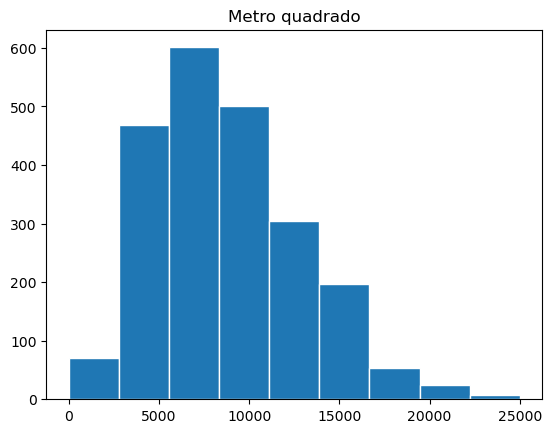

<Figure size 1000x600 with 0 Axes>

In [5]:
bin_edges = np.linspace(0, 25000, 10)
df_com_metro_quadrado[['Metro quadrado']].hist(bins = bin_edges, grid = False, edgecolor='white')
plt.figure(figsize=(10, 6))


Calculando a mediana da nossa Amostra:

In [6]:
df_com_metro_quadrado['Metro quadrado'].median()

8190.7

Com isso em mente, vamos utilizar o método de Bootstrap para obter um intervalo de confiança para a mediana:

In [7]:
#cria uma nova amostra a partir de uma permutação aleatória da amostra original
#e retorna a mediana do metro quadrado
def one_bootstrap_median(data, column):
    resample = data.sample(frac=1, replace=True)
    return resample[column].median()

In [8]:
#calcula a mediana da nova amostra
one_bootstrap_median(df_com_metro_quadrado, 'Metro quadrado')

8077.9

In [12]:
# Gera uma lista de medianas de 50000 amostras bootstrap
num_repetitions = 50000
bstrap_medians = []
for i in np.arange(num_repetitions):
    bstrap_medians.append(one_bootstrap_median(df_com_metro_quadrado, 'Metro quadrado'))

In [13]:
#calcula o intervalo que contém 95% das medianas calculadas acima
left = np.percentile(bstrap_medians, 2.5)
right = np.percentile(bstrap_medians, 97.5)

print(left, right)

8000.0 8490.6


Representando o intervalo através de um histograma:

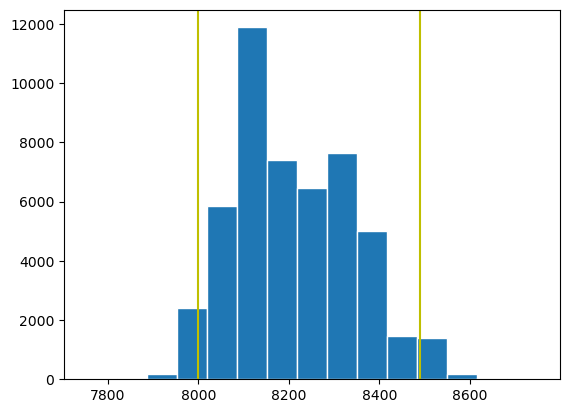

In [14]:
plt.hist(bstrap_medians, bins=15, edgecolor = 'white')
plt.axvline(x=left, color='y')
plt.axvline(x=right, color='y')

Chegamos a conclusão, portanto, que, com 95% de confiança, a mediana do valor do metro quadrado de um imóvel em Belo Horizonte está entre 8000 e 8490.6 reais. Vamos repetir o mesmo processo para a média:

In [33]:
df_com_metro_quadrado['Metro quadrado'].mean()

8903.205150022392

In [15]:
#cria uma nova amostra a partir de uma permutação aleatória da amostra original
#e retorna a média do metro quadrado
def one_bootstrap_mean(data, column):
    resample = data.sample(frac=1, replace=True)
    return resample[column].mean()

In [16]:
# Gera uma lista de médias de 50000 amostras bootstrap
num_repetitions = 50000
bstrap_means = []
for i in np.arange(num_repetitions):
    bstrap_means.append(one_bootstrap_mean(df_com_metro_quadrado, 'Metro quadrado'))

In [19]:
#calcula o intervalo que contém 95% das médias calculadas acima
left = round(np.percentile(bstrap_means, 2.5),2)
right = round(np.percentile(bstrap_means, 97.5),2)

print(left, right)

8699.52 9120.08


Representando o intervalo através de um histograma:

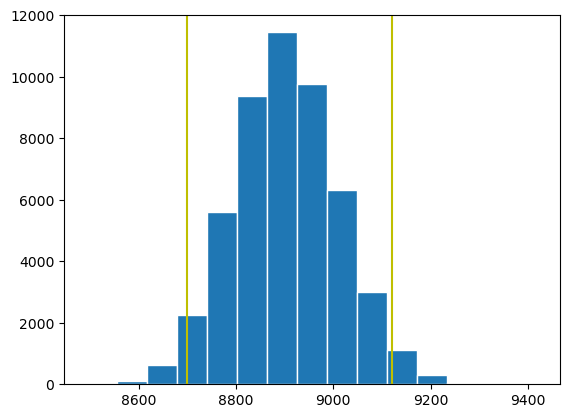

In [20]:
plt.hist(bstrap_means, bins=15, edgecolor = 'white')
plt.axvline(x=left, color='y')
plt.axvline(x=right, color='y')

Chegamos a conclusão, portanto, que, com 95% de confiança, a média do valor do metro quadrado de um imóvel em Belo Horizonte está entre 8700 e 9120 reais.

Agora vamos repetir o mesmo processo para apartamentos


In [22]:
#Filtrando os imóveis do tipo 'Apartamento'
dfResidencial = df_com_metro_quadrado[df_com_metro_quadrado['Tipo Imóvel'].isin(['Apartamento'])]
dfResidencial

,Bairro,IQVU,Código,Título,Tipo Imóvel,Endereço,Área interna,Área externa,# de quartos,# de banheiros,# de suítes,# de vagas,IPTU,Condomínio,Preço,Área total,Metro quadrado
2,Carmo,0.775673,22922,"Apartamento 2 Quartos à venda, Carmo - Belo Ho...",Apartamento,"746,Rua Pium-I,Carmo,Belo Horizonte",63.81,0.0,2.0,2.0,1.0,2.0,NaN,NaN,915000.0,63.81,14339.4
3,Carmo,0.775673,22918,"Apartamento 2 Quartos à venda, Carmo - Belo Ho...",Apartamento,"746,Rua Pium-I,Carmo,Belo Horizonte",65.10,0.0,2.0,2.0,1.0,2.0,NaN,NaN,883000.0,65.10,13563.7
7,Serra,0.775936,22883,"Apartamento 2 Quartos à venda, Serra - Belo Ho...",Apartamento,"530,Rua Monte Alegre,Serra,Belo Horizonte",72.00,0.0,2.0,2.0,2.0,2.0,NaN,NaN,700000.0,72.00,9722.2
9,Serra,0.775936,23396,"Apartamento 4 Quartos à venda, Serra - Belo Ho...",Apartamento,"131,Rua Serranos,Serra,Belo Horizonte",220.00,0.0,4.0,2.0,2.0,4.0,1246.23,2850.0,1890000.0,220.00,8590.9
11,Serra,0.775936,18588,"Apartamento 4 Quartos à venda, Serra - Belo Ho...",Apartamento,"204,Rua Henrique Passini,Serra,Belo Horizonte",136.39,0.0,4.0,3.0,2.0,4.0,NaN,NaN,1944300.0,136.39,14255.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2274,Ouro Preto,0.742575,20772,"Apartamento 3 Quartos à venda, Ouro Preto - Be...",Apartamento,"566,Rua Sena Madureira,Ouro Preto,Belo Horizonte",76.89,0.0,3.0,2.0,1.0,1.0,NaN,NaN,492550.3,76.89,6405.9
2275,Lourdes,0.804587,14021,"Apartamento 1 Quarto à venda, Lourdes - Belo H...",Apartamento,"1353,Rua Santa Catarina,Lourdes,Belo Horizonte",71.45,0.0,1.0,1.0,1.0,2.0,NaN,NaN,970000.0,71.45,13575.9
2284,Sagrada Família,0.785570,5391,"Apartamento 3 Quartos à venda, Sagrada Família...",Apartamento,"685,Rua São Roque,Sagrada Família,Belo Horizonte",158.08,0.0,3.0,2.0,1.0,4.0,319.34,399.0,937784.1,158.08,5932.3
2285,Sagrada Família,0.785570,5385,"Apartamento 3 Quartos à venda, Sagrada Família...",Apartamento,"685,Rua São Roque,Sagrada Família,Belo Horizonte",77.74,0.0,3.0,2.0,1.0,2.0,319.34,399.0,585000.0,77.74,7525.1


Histograma dos preços do metro quadrado dos apartamentos

<Figure size 1000x600 with 0 Axes>

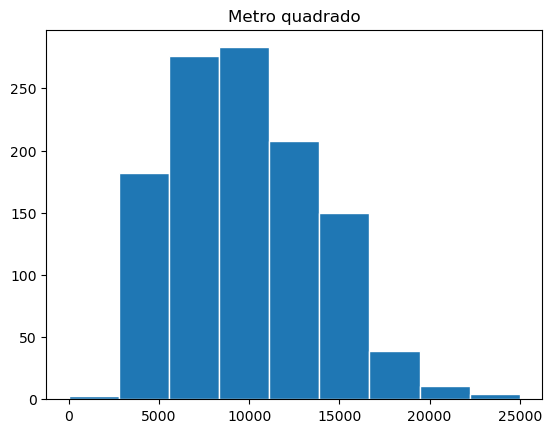

<Figure size 1000x600 with 0 Axes>

In [23]:
bin_edges = np.linspace(0, 25000, 10)
dfResidencial[['Metro quadrado']].hist(bins = bin_edges, grid = False, edgecolor='white')
plt.figure(figsize=(10, 6))

Mediana dos valores

In [24]:
dfResidencial['Metro quadrado'].median()

9375.0

In [26]:
#calcula a mediana da nova amostra
one_bootstrap_median(dfResidencial, 'Metro quadrado')

9312.5

In [27]:
# Gera uma lista de medianas de 50000 amostras bootstrap
num_repetitions = 50000
bstrap_medians = []
for i in np.arange(num_repetitions):
    bstrap_medians.append(one_bootstrap_median(dfResidencial, 'Metro quadrado'))

In [29]:
#calcula o intervalo que contém 95% das medianas calculadas acima
left = np.percentile(bstrap_medians, 2.5)
right = np.percentile(bstrap_medians, 97.5)

print(round(left,2), round(right,2))

9165.9 9686.45


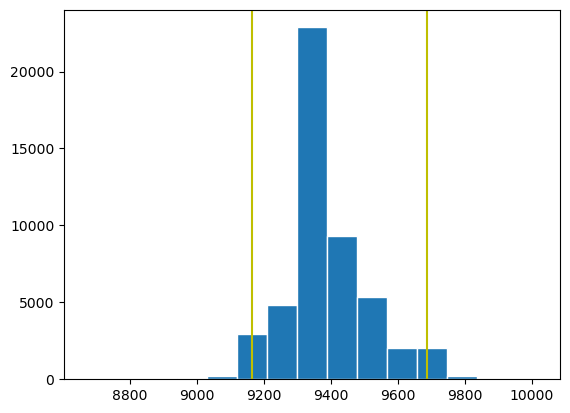

In [30]:
plt.hist(bstrap_medians, bins=15, edgecolor = 'white')
plt.axvline(x=left, color='y')
plt.axvline(x=right, color='y')

Portanto, com 95% de confiança a mediana dos preços por metro quadrado de apartamento estará entre 9165.9 e 9686.45

Agora para a média

In [32]:
dfResidencial['Metro quadrado'].mean()

9783.401124567474

In [34]:
# Gera uma lista de médias de 50000 amostras bootstrap
num_repetitions = 50000
bstrap_means = []
for i in np.arange(num_repetitions):
    bstrap_means.append(one_bootstrap_mean(dfResidencial, 'Metro quadrado'))

In [35]:
#calcula o intervalo que contém 95% das medianas calculadas acima
left = np.percentile(bstrap_means, 2.5)
right = np.percentile(bstrap_means, 97.5)

print(round(left,2), round(right,2))

9555.87 10012.52


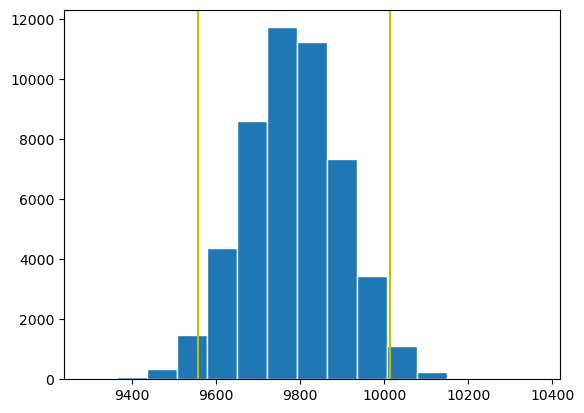

In [36]:
plt.hist(bstrap_means, bins=15, edgecolor = 'white')
plt.axvline(x=left, color='y')
plt.axvline(x=right, color='y')

# TESTE DE HIPÓTESE

In [73]:
#importando o iqvu dos bairros
iqvu = pd.read_csv('iqvu_bh.csv')
iqvu = iqvu.rename(columns={'NOMEUP': 'Bairro'})
iqvu

,Bairro,IQVU
0,Abilio Machado,0.714309
1,Anchieta,0.755254
2,Antonio Carlos,0.709897
3,Bairro das Industrias,0.753676
4,Baleia,0.705870
...,...,...
93,Santa Lúcia,0.824468
94,Taquaril,0.535259
95,Tupi/Floramar,0.636245
96,Venda Nova,0.746811


In [74]:
#Calculando o preço médio por bairro
PrecoMedio = dfResidencial.groupby('Bairro')['Preço'].mean()
dfPrecoMedio = PrecoMedio.reset_index()
dfPrecoMedio['Bairro'] = dfPrecoMedio['Bairro'].str.strip()
dfPrecoMedio = dfPrecoMedio.rename(columns={'Preço': 'Preço médio'})
dfPrecoMedio

,Bairro,Preço médio
0,Alto Barroca,4.511745e+05
1,Anchieta,1.448283e+06
2,Barro Preto,9.295090e+05
3,Barroca,5.450000e+05
4,Belvedere,2.426875e+06
5,Boa Viagem,1.100000e+06
6,Buritis,8.046182e+05
7,CENTRO,4.842866e+05
8,Cachoeirinha,3.395000e+05
9,Carlos Prates,8.500000e+05


In [75]:
#Unido preço médio e iqvu
tabela = pd.merge(iqvu, dfPrecoMedio, on='Bairro')
print(tabela)

             Bairro      IQVU   Preço médio
0          Anchieta  0.755254  1.448283e+06
1       Barro Preto  0.856587  9.295090e+05
2           Barroca  0.765196  5.450000e+05
3         Belvedere  0.769293  2.426875e+06
4           Buritis  0.672025  8.046182e+05
5      Cachoeirinha  0.693678  3.395000e+05
6             Carmo  0.775673  1.259261e+06
7           Castelo  0.595462  3.993500e+05
8            CENTRO  0.798798  4.842866e+05
9          Cruzeiro  0.775936  8.881119e+05
10          Estoril  0.672025  3.500000e+05
11         Floresta  0.785570  5.609950e+05
12     Funcionários  0.804587  1.508204e+06
13        Gutierrez  0.765196  1.253246e+06
14          Lourdes  0.804587  1.605529e+06
15       Luxemburgo  0.765196  9.244890e+05
16       Ouro Preto  0.742575  4.925503e+05
17  Sagrada Família  0.785570  6.178697e+05
18   Santa Efigênia  0.725591  6.469175e+05
19       Santa Inês  0.794606  5.800000e+05
20     Santa Tereza  0.785570  5.541667e+05
21  Santo Agostinho  0.804587  1

***Estatística de Teste usando `pearsonr`***

In [76]:
from scipy.stats import pearsonr
correlation, p_value = pearsonr(tabela['IQVU'], tabela['Preço médio'])
correlation, p_value

(0.44934755212402744, 0.011214943833879611)

**Estatística de Teste, usando testes de permutação**

Observed Correlation: 0.44934755212402766
P-value: 0.0115


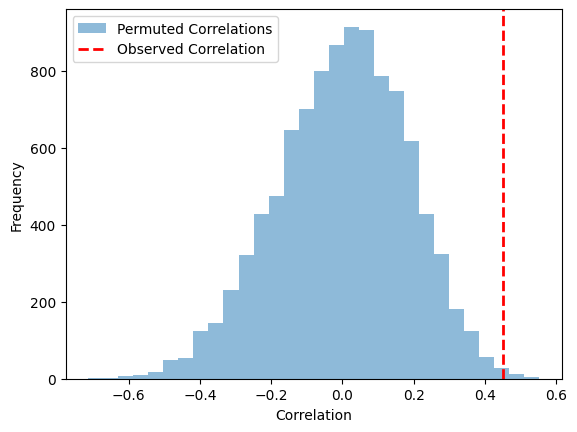

In [85]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

def perm_test(df, col1, col2, num_permutations):
    # calculate observed correlation
    observed_corr = df[col1].corr(df[col2])

    permuted_corrs = []

    for _ in range(num_permutations):
        # shuffle one of the columns
        shuffled_col = df[col1].sample(frac=1, replace=False).reset_index(drop=True)

        # compute the correlation with the shuffled data
        corr = shuffled_col.corr(df[col2])
        permuted_corrs.append(corr)

    p_value = (np.abs(permuted_corrs) >= np.abs(observed_corr)).mean()

    return observed_corr, p_value, permuted_corrs

observed_corr, p_value, permuted_corrs = perm_test(tabela, 'IQVU', 'Preço médio', num_permutations=10000)

print(f"Observed Correlation: {observed_corr}")
print(f"P-value: {p_value}")

plt.hist(permuted_corrs, bins=30, alpha=0.5, label='Permuted Correlations')
plt.axvline(observed_corr, color='red', linestyle='dashed', linewidth=2, label='Observed Correlation')
plt.xlabel('Correlation')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Tabelo com a média por bairro com todos os tipos de imóveis


In [78]:
dfPrecoMedio_all = df.groupby('Bairro')['Preço'].mean().reset_index()
dfPrecoMedio_all = dfPrecoMedio.rename(columns={'Preço': 'Preço médio'})
dfPrecoMedio_all['Bairro'] = dfPrecoMedio_all['Bairro'].str.strip()
dfPrecoMedio_all

,Bairro,Preço médio
0,Alto Barroca,4.511745e+05
1,Anchieta,1.448283e+06
2,Barro Preto,9.295090e+05
3,Barroca,5.450000e+05
4,Belvedere,2.426875e+06
5,Boa Viagem,1.100000e+06
6,Buritis,8.046182e+05
7,CENTRO,4.842866e+05
8,Cachoeirinha,3.395000e+05
9,Carlos Prates,8.500000e+05


Merge iqvu e a tabela


In [79]:
tabela2 = pd.merge(iqvu, dfPrecoMedio_all, on='Bairro')
print(tabela2)

             Bairro      IQVU   Preço médio
0          Anchieta  0.755254  1.448283e+06
1       Barro Preto  0.856587  9.295090e+05
2           Barroca  0.765196  5.450000e+05
3         Belvedere  0.769293  2.426875e+06
4           Buritis  0.672025  8.046182e+05
5      Cachoeirinha  0.693678  3.395000e+05
6             Carmo  0.775673  1.259261e+06
7           Castelo  0.595462  3.993500e+05
8            CENTRO  0.798798  4.842866e+05
9          Cruzeiro  0.775936  8.881119e+05
10          Estoril  0.672025  3.500000e+05
11         Floresta  0.785570  5.609950e+05
12     Funcionários  0.804587  1.508204e+06
13        Gutierrez  0.765196  1.253246e+06
14          Lourdes  0.804587  1.605529e+06
15       Luxemburgo  0.765196  9.244890e+05
16       Ouro Preto  0.742575  4.925503e+05
17  Sagrada Família  0.785570  6.178697e+05
18   Santa Efigênia  0.725591  6.469175e+05
19       Santa Inês  0.794606  5.800000e+05
20     Santa Tereza  0.785570  5.541667e+05
21  Santo Agostinho  0.804587  1

Hipótese com todos os tipos de imóveis

Observed Correlation: 0.44934755212402766
P-value: 0.0117


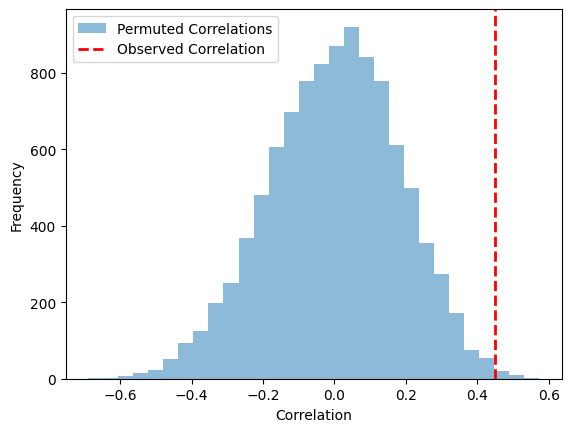

In [86]:
observed_corr2, p_value2, permuted_corrs2 = perm_test(tabela2, 'IQVU', 'Preço médio', num_permutations=10000)

print(f"Observed Correlation: {observed_corr2}")
print(f"P-value: {p_value2}")

plt.hist(permuted_corrs2, bins=30, alpha=0.5, label='Permuted Correlations')
plt.axvline(observed_corr2, color='red', linestyle='dashed', linewidth=2, label='Observed Correlation')
plt.xlabel('Correlation')
plt.ylabel('Frequency')
plt.legend()
plt.show()